# Stefan Spataro

## Research question/interests

**How does the stock price of a tech company compare to the stock price of its competitors at a certain time?** For example, if Apple (AAPL: NASDAQ) and Microsoft (MSFT: NASDAQ) have common price increases, and say APPL increases by 10%, could we discover more details about the market price of MSFT? Factors we could analyze could be the difference in price increases, volume of stocks traded, and time of continuously increasing prices. This data analysis could output relevant results to help investors make decisions when researching opportunities in the tech sector. After conducting an EDA into both MSFT and AAPL dataframes, I realize I may not be able to discover as much information as I previously thought. However, my goal is to analyze more into the percent change between the two companies to discover more information about their relation.

**imports:** pandas, numpy, seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display_html
from matplotlib.pyplot import figure
from matplotlib.dates import YearLocator, DateFormatter

import sys
sys.path.append('/Users/stefa/ComputerScience/DATA301/project-group-group11/analysis/code')

from functions_analysis2 import process_data
from functions_analysis2 import compare_data
from functions_analysis2 import reformat

**Import data**

In [2]:
df1 = pd.read_csv("../data/raw/AAPL.csv")
df2 = pd.read_csv("../data/raw/MSFT.csv")

df1_styler = df1.head().style.set_table_attributes("style='display:inline'").set_caption('df1')
df2_styler = df2.head().style.set_table_attributes("style='display:inline'").set_caption('df2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.683071,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.690725,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.545338,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.300467,50559700


**understanding data**

In [3]:
df1.shape

(3271, 7)

In [4]:
df2.shape

(3271, 7)

In [5]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df1['Open'].unique()

array([  7.6225  ,   7.664286,   7.656429, ..., 131.380005, 129.669998,
       127.989998])

In [8]:
df2['Open'].unique()

array([ 30.620001,  30.85    ,  30.879999, ..., 238.699997, 236.889999,
       235.649994])

In [9]:
df1['Close'].unique()

array([  7.643214,   7.656429,   7.534643, ..., 130.029999, 126.040001,
       129.610001])

In [10]:
df2['Close'].unique()

array([ 30.950001,  30.959999,  30.77    , ..., 236.960007, 234.529999,
       241.009995])

## Using method chains to:
- narrow down graph to:
    1. date
    2. open
    3. close
    4. pct_change
- merge
- format datetime
- generate moving averages
- generate price % changes
- remove null values

In [11]:
df = process_data('../data/raw/AAPL.csv', '../data/raw/MSFT.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.to_csv('../data/processed/analysis2_final.csv')

**change:** referenced: https://practicaldatascience.co.uk/data-science/how-to-calculate-percentage-change-between-columns-in-pandas#:~:text=Pandas%2C%20rather%20helpfully%2C%20includes%20a,one%20row%20and%20the%20next.

In [12]:
big_apple = df['D30_pct_chg_AAPL'].max()
big_apple

0.007809158691415471

In [13]:
big_microsoft = df['D30_pct_chg_MSFT'].max()
big_microsoft

0.008232921185243122

In [14]:
d = np.where(df['D30_pct_chg_AAPL'] == big_apple)
d[0][0]

3143

In [15]:
d = np.where(df['D30_pct_chg_MSFT'] == big_microsoft)
d[0][0]

820

# **Visualizations**

### 30-Day moving averages:
the average price of the previous 30 days

In [16]:
df2 = reformat(df)
print(df2)

           Date          stock       price
0    2010-02-16  D30_move_AAPL    7.275952
1    2010-02-17  D30_move_AAPL    7.262310
2    2010-02-18  D30_move_AAPL    7.248679
3    2010-02-19  D30_move_AAPL    7.237607
4    2010-02-22  D30_move_AAPL    7.225512
...         ...            ...         ...
6479 2022-12-22  D30_move_MSFT  246.168666
6480 2022-12-23  D30_move_MSFT  246.026999
6481 2022-12-27  D30_move_MSFT  245.688666
6482 2022-12-28  D30_move_MSFT  245.454666
6483 2022-12-29  D30_move_MSFT  245.422666

[6484 rows x 3 columns]


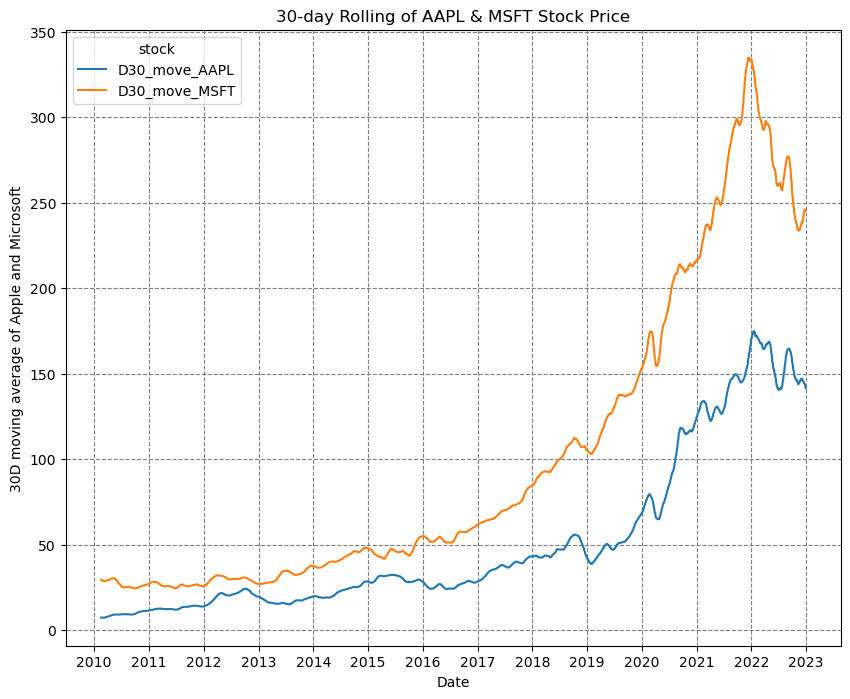

In [17]:
#df2['Date'] = pd.to_datetime(df2['Date'])
plt.figure(figsize=(10,8))

sns.lineplot(data=df2, x='Date', y='price', hue='stock', dashes=False)
plt.title('30-day Rolling of AAPL & MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('30D moving average of Apple and Microsoft')
plt.grid(linestyle = '--', color = 'gray')

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

### Discussion section

**Note:** As we can see, the Microsoft share price is consistently larger than Apples. This, however, is not a sign that Microsoft is a larger company than Apple. In order to determine company sizes, we must analyze the market capitalization (market value) of the companies. Market cap is calculate by number of outstanding shared multiplied by the share price. However if the share quantity is unavailable, we can compare the companies growths by analyzing the percent changes in their stock value, see below.

**summary:**
after comparing the 30 day rolling prices of AAPL and MSFT, I will be able to further analyze the difference in percent change between the two companies. This can provide insight into whether there was a tech industry incline, or a competition between the AAPL and MSFT.

### 30-Day moving percent changes (Difference)
percent change over the previous 30 market days

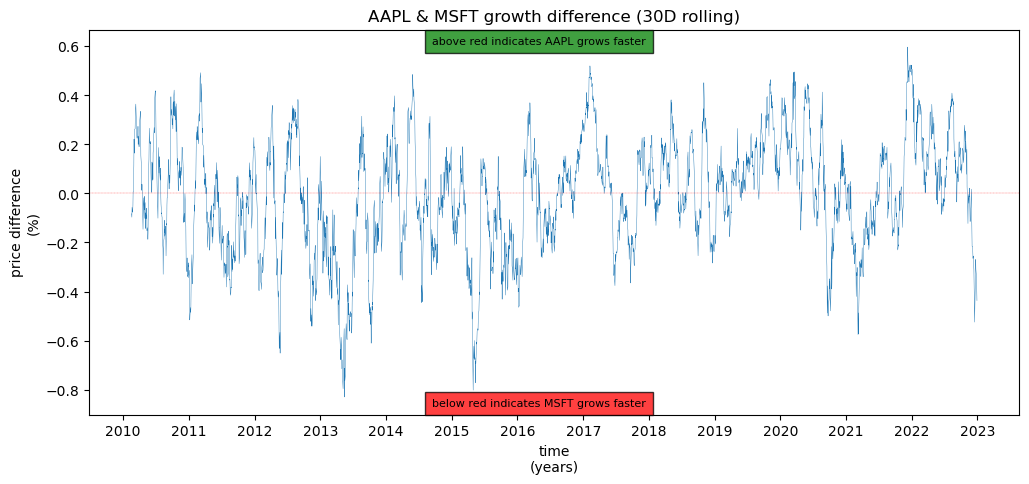

In [18]:
compare = df['D30_pct_chg_AAPL'].compare(df['D30_pct_chg_MSFT'])
figure(figsize=(12,5))
sns.lineplot(x='Date', y=compare['self']*100 - compare['other']*100, data=df, linewidth=0.3)
plt.title('AAPL & MSFT growth difference (30D rolling)')
plt.xlabel('time\n(years)')
plt.ylabel('price difference\n(%)')
plt.axhline(y=0, color='r', linestyle='--', linewidth = 0.2)

years = YearLocator()
formatter = DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(formatter)

plt.figtext(0.5, 0.85, "above red indicates AAPL grows faster", ha="center", fontsize=8, bbox={"facecolor": "green", "alpha": 0.75, "pad": 5})
plt.figtext(0.5, 0.126, "below red indicates MSFT grows faster", ha="center", fontsize=8, bbox={"facecolor": "red", "alpha": 0.75, "pad": 5})

plt.show()

**30D rolling price change % explanation:**
the price change as a percentage can help us understand a companies time of growth. When the data is above the 0% threshold (red line), we can conclude the companies stock value is increasing within the 30D period. However, when the data is below the threshold, the companies stock value is decreasing. Additionally, if the plotted line has a positive slope, the companies stock value may not be increasing, but increasing more than the previous market days, and vice versa for a negative slope.

### Which is growing faster?

In [19]:
growth = compare_data(df)
growth

,AAPL_faster,MSFT_faster
Year,,
2010,140,83
2011,78,174
2012,101,149
2013,44,208
2014,124,128
2015,45,207
2016,129,123
2017,150,101
2018,148,103


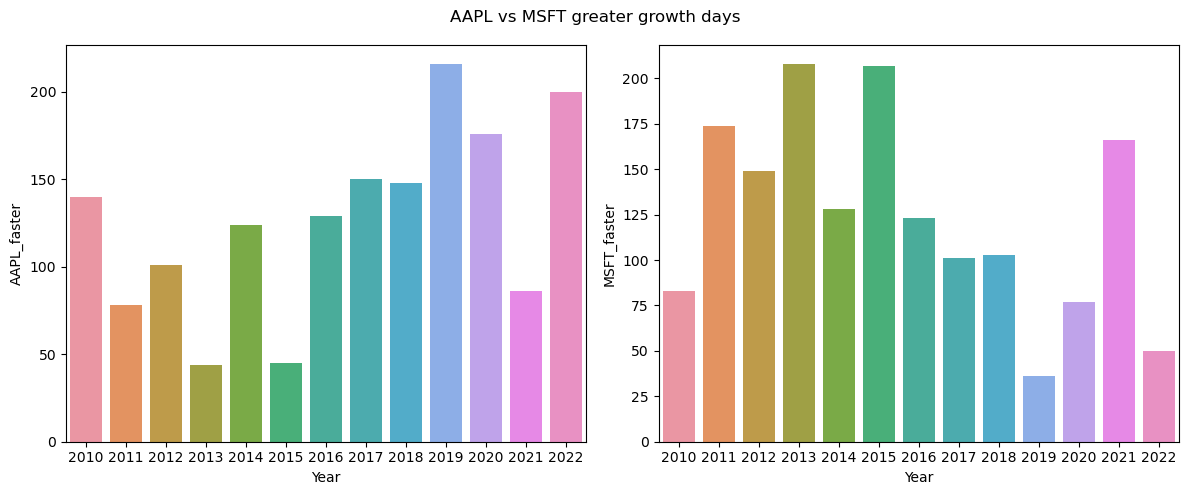

In [20]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.barplot(data=growth, x=growth.index, y='AAPL_faster', ax=axes[0])
sns.barplot(data=growth, x=growth.index, y='MSFT_faster', ax=axes[1])
plt.suptitle('AAPL vs MSFT greater growth days')
plt.show()

**Note:** The plot on the left shows how many days of the year AAPL grew faster than MSFT, and vice versa for the right side.

---

**summary**: After analyzing and visualizing the stock market data of AAPL and MSFT, I am able to compare the companies competitive history. This allows me to understand the resilience of each stock and dive further into what caused one company to outperform the other. 

I've also been able to answer my question of "How does the stock price of a tech company compare to the stock price of its competitors at a certain time?", which is clearly understood by the 'AAPL & MSFT growth difference' plot. In short, there were periods where one company was outperforming the other by a lot, which indicates investor confidence with corresponding business practices, product affordability, and innovation. As seen in the 2011-2016 range in the bar plots above, Microsoft was outperforming apple for many parts of the year. However, Apple has turned things around in the 2017-2022 range with the exception of 2021 which probably occured due to market volatility from the current uncertainty of real world circumstances ie. the COVID crisis.

I was, however, unable to understand if the share values were influenced by competition between apple and microsoft, or if there was a tech industry decline.

Throughout the analysis, I realized the share value was not the only relevant information to understanding a companies value. Microsoft, currently a 2.2 trillion dollar company, has a higher share price than Apple, which is currently a 2.7 trillion dollar company. This means the number of outstanding shares is a key value in realizing a companies total value. In order to obtain my information without the the number of outstanding shares, I ended up comparing the daily percent change based on a 30-Day rolling standpoint.